In [219]:
preprocessedtrain = "C:\\Users\\hpunetha\\PycharmProjects\\SML_Project\\datap\\train.csv"

origtrain = "C:\\Users\\hpunetha\\PycharmProjects\\SML_Project\\data\\train.csv"

In [220]:
import pandas
import numpy

# datatrain = pandas.read_csv(preprocessedtrain)
datatrain = pandas.read_csv(origtrain)

datatrain.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [221]:
nullcomment = datatrain[(datatrain['comment_text'].isnull())]
nullcomment.shape[0]

0

In [222]:
classtoxic =datatrain[(datatrain['toxic']==1)]
classsevtoxic =datatrain[(datatrain['severe_toxic']==1)]
classobscene =datatrain[(datatrain['obscene']==1)]
classthreat =datatrain[(datatrain['threat']==1)]
classinsult =datatrain[(datatrain['insult']==1)]
classidentity_hate =datatrain[(datatrain['identity_hate']==1)]

classnone = datatrain[(datatrain['toxic']!=1) & (datatrain['severe_toxic']!=1) & (datatrain['obscene']!=1) & (datatrain['threat']!=1) & (datatrain['insult']!=1) &  (datatrain['identity_hate']!=1)]

ratios=[]

totalrecs = datatrain.shape[0]

toxratio=classtoxic.shape[0]/totalrecs
sevtoxratio =classsevtoxic.shape[0]/totalrecs
obsratio =classobscene.shape[0]/totalrecs
thrratio = classthreat.shape[0]/totalrecs
insratio = classinsult.shape[0]/totalrecs
idharatio=classidentity_hate.shape[0]/totalrecs
nonratio =classnone.shape[0]/totalrecs


ratios.append(toxratio)
ratios.append(sevtoxratio)
ratios.append(obsratio)
ratios.append(thrratio)
ratios.append(insratio)
ratios.append(idharatio)
ratios.append(nonratio)

print(classtoxic.shape[0],toxratio)
print(classsevtoxic.shape[0],sevtoxratio)
print(classobscene.shape[0],obsratio)
print(classthreat.shape[0],thrratio)
print(classinsult.shape[0],insratio)
print(classidentity_hate.shape[0],nonratio)
print(classnone.shape[0],nonratio)

classd =['Toxic','Severe Toxic','Obscene','Threat','Insult','Identity hate','None']

15294 0.09584448302009764
1595 0.009995550569965721
8449 0.052948217407925
478 0.002995531769557125
7877 0.04936360616904074
1405 0.8983211235124177
143346 0.8983211235124177


Sample Comments

In [223]:
print(datatrain['comment_text'][11])


bbq 

be a man and lets discuss it-maybe over the phone?


In [224]:
print(datatrain['comment_text'][19])

Don't mean to bother you 

I see that you're writing something regarding removing anything posted here and if you do oh well but if not and you can acctually discuss this with me then even better.

I'd like to ask you to take a closer look at the Premature wrestling deaths catagory and the men listed in it, surely these men belong together in some catagory. Is there anything that you think we can do with the catagory besides delting it?


In [225]:
print(datatrain['comment_text'][888])

. Ok Dennis Brown thanks for telling me I was taking this a bit way too serious ill be careful for this time stupid bots.


In [226]:
# datatrain.isna().sum()

In [227]:
from plotly.offline import plot
import plotly.graph_objs as go

tracewords = go.Pie(labels=classd[:-1], values=ratios[:-1])
datawords = go.Data([tracewords])
layout = dict( title='Toxicity')
fig1 = dict (data=datawords,layout=layout)
plot(fig1, filename='classratios.html')


'file://C:\\Users\\hpunetha\\PycharmProjects\\SML_Project\\classratios.html'

In [228]:
counts= numpy.array(ratios)
counts=counts*totalrecs


In [229]:
tracewords = go.Bar(x=classd[:-1],y=counts[:-1],name="Toxicity")
# trace2 = go.Bar(x=classd[-1],y=counts[-1],name="None")
# datawords = go.Data([tracewords,trace2])
datawords = go.Data([tracewords])
layout = dict( title=' Classwise comments count ',xaxis=dict( title='Class'), yaxis=dict(title='Counts'), barmode = "overlay")
fig1 = dict (data=datawords,layout=layout)
plot(fig1, filename='classwisecounts.html')


'file://C:\\Users\\hpunetha\\PycharmProjects\\SML_Project\\classwisecounts.html'

In [230]:
# Toxic, Obscene and insult comments are highly correlated.


In [231]:

from matplotlib_venn import venn3 as v3
from matplotlib_venn import venn3_circles as vc3


In [232]:
toxicsetcount,a= datatrain[(datatrain['toxic']==1) & (datatrain['obscene']==0) & (datatrain['insult']==0)].shape
toxicsetcount

5978

In [233]:
insultsetcount,a= datatrain[(datatrain['toxic']==0) & (datatrain['obscene']==0) & (datatrain['insult']==1)].shape
obscenesetcount,a= datatrain[(datatrain['toxic']==0) & (datatrain['obscene']==1) & (datatrain['insult']==0)].shape

toxicAndinsult,a = datatrain[(datatrain['toxic']==1) & (datatrain['obscene']==0) & (datatrain['insult']==1)].shape
obsceneAndinsult,a = datatrain[(datatrain['toxic']==0) & (datatrain['obscene']==1) & (datatrain['insult']==1)].shape
toxicAndobscene,a = datatrain[(datatrain['toxic']==1) & (datatrain['obscene']==1) & (datatrain['insult']==0)].shape

allthree,a = datatrain[(datatrain['toxic']==1) & (datatrain['obscene']==1) & (datatrain['insult']==1)].shape


[<matplotlib.patches.Circle object at 0x000001F35F305860>, <matplotlib.patches.Circle object at 0x000001F35F305BA8>, <matplotlib.patches.Circle object at 0x000001F35F2DDAC8>]


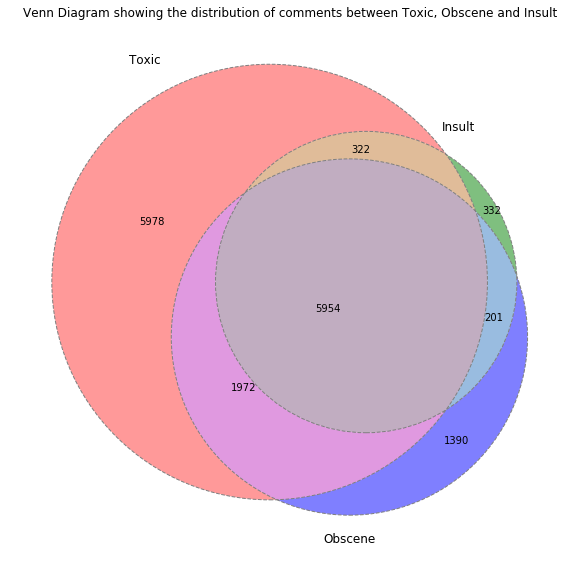

In [234]:
from matplotlib import pyplot as mplot

mplot.figure(figsize=(10,10))
mplot.title("Venn Diagram showing the distribution of comments between Toxic, Obscene and Insult")

vendiag = v3(subsets=(toxicsetcount,insultsetcount,obscenesetcount,toxicAndinsult,toxicAndobscene,obsceneAndinsult,allthree), set_labels=('Toxic','Insult','Obscene'))

drawcirc = vc3(subsets=(toxicsetcount,insultsetcount,obscenesetcount,toxicAndinsult,toxicAndobscene,obsceneAndinsult,allthree),linestyle='dashed', linewidth=1, color="grey" )


vendiag.get_patch_by_id('010').set_alpha(0.50)
vendiag.get_patch_by_id('001').set_alpha(0.50)


print(drawcirc)



mplot.show()

In [235]:
from matplotlib_venn import venn2_circles as vc2
from matplotlib_venn import venn2 as v2

In [236]:
toxicsetcount,a= datatrain[(datatrain['toxic']==1) & (datatrain['severe_toxic']==0)].shape
sevtoxicsetcount,a= datatrain[(datatrain['toxic']==0) & (datatrain['severe_toxic']==1)].shape
bothsetcount,a=datatrain[(datatrain['toxic']==1) & (datatrain['severe_toxic']==1)].shape


In [237]:
toxicsetcount,sevtoxicsetcount,bothsetcount

(13699, 0, 1595)

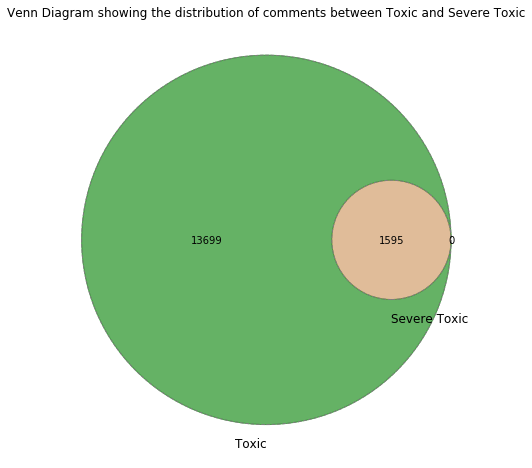

Above figure shows that Severe Toxic set is a proper subset of Toxic set


In [238]:
mplot.figure(figsize=(8,8))
mplot.title("Venn Diagram showing the distribution of comments between Toxic and Severe Toxic")

vendiag = v2(subsets=(toxicsetcount,sevtoxicsetcount,bothsetcount), set_labels=('Toxic','Severe Toxic'))

drawcirc = vc2(subsets=(toxicsetcount,sevtoxicsetcount,bothsetcount),linestyle='dashed', linewidth=1, color="grey" )


vendiag.get_patch_by_id('10').set_alpha(0.6)
vendiag.get_patch_by_id('01').set_alpha(0.50)
vendiag.get_patch_by_id('10').set_color("green")



mplot.show()

print("Above figure shows that Severe Toxic set is a proper subset of Toxic set")

In [239]:
from wordcloud import WordCloud


import re as regexp
import string
from collections import Counter

In [240]:
countwords ={}


def remStopW(line):
    from nltk.corpus import stopwords
    stopFree = []

    stopWordsEng = stopwords.words('english')
    for word in line:
        if word not in stopWordsEng:
            stopFree.append(word)


    return stopFree

def preprocessTitles(line):
    dash = "-"
    # allOtherPunct = "!#$%&'()*+,./:;<=>?@[\]^_`{|}~"
    allOtherPunct = string.punctuation

    for letter in dash:
        line = line.replace(letter, ' ')

    for letter in allOtherPunct:
        line = line.replace(letter, '')

    line = line.lower().split(' ')
    line = remStopW(line)
    line =' '.join(line)
    line=line.strip()
    return line


# cal = "#hello and am are allOtherPunct = !#$%&'()*+,./:;<=>?@[\]^_`{|}~"
# preprocessTitles(cal)



In [241]:
datatrain['threat'].values.tolist().count(0)

159093

In [242]:
datatrain['threat'].values.tolist().count(1)/datatrain['threat'].values.tolist().count(0)

0.0030045319404373542

In [243]:
datatrain['identity_hate'].values.tolist().count(1)/datatrain['identity_hate'].values.tolist().count(0)

0.008883072215267504

In [244]:
# datatrain[datatrain['toxic'] == 1]['comment_text']

In [245]:
countwords ={}
colvals = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
for col in colvals:    
    text = Counter()        
    
    datatrain[datatrain[col] == 1]['comment_text'].apply(lambda t: text.update(preprocessTitles(t).split()))
    countwords[col] = pandas.DataFrame.from_dict(text, orient='index').rename(columns={0: 'valcount'}).sort_values('valcount', ascending=False)

In [246]:
# countwords

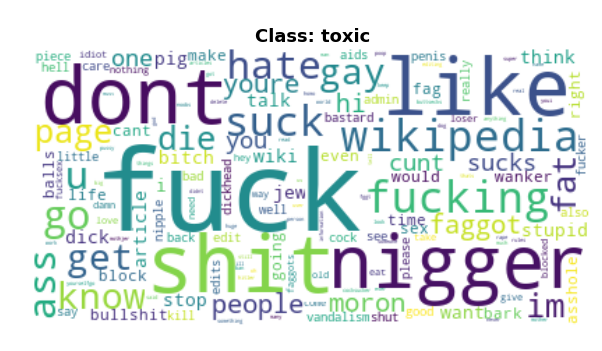

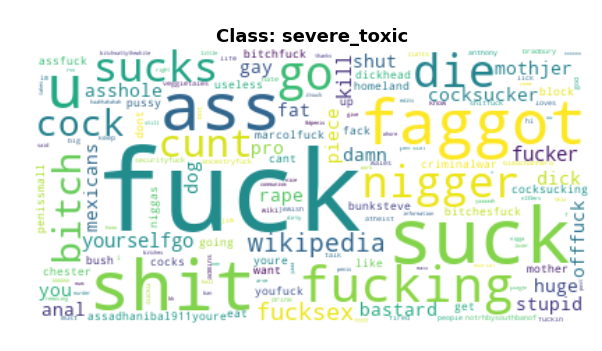

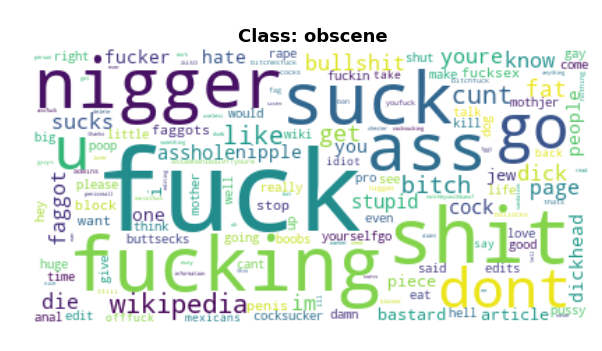

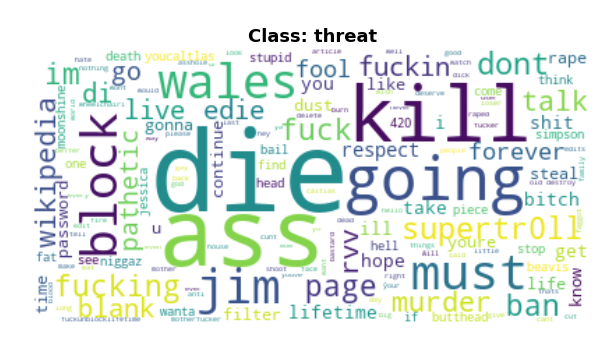

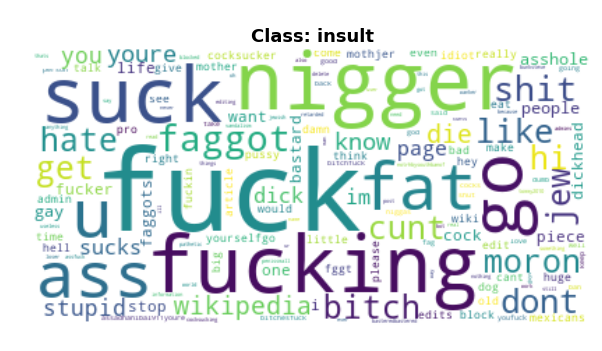

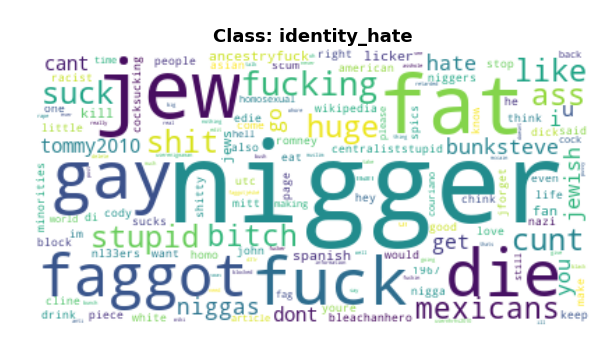

In [247]:
from matplotlib import pyplot as mplot

for col in countwords:    
    wordsl = countwords[col]    
    wc = WordCloud(background_color='white', max_words=150, max_font_size=80, random_state=10).generate_from_frequencies(wordsl.to_dict()['valcount'])
    fig = mplot.figure(figsize=(10, 8))
    mplot.title('\n' + "Class: "+ col, fontsize=18, fontweight='bold')
    mplot.imshow(wc, interpolation = 'bilinear')
    mplot.axis('off')
    mplot.show()

Feature analysis


In [248]:
datatrain['comment_length'] = datatrain['comment_text'].apply(len)

In [249]:
# datatrain['comment_length']

0          264
1          112
2          233
3          622
4           67
5           65
6           44
7          115
8          472
9           70
10        2875
11          56
12         319
13         819
14         219
15         610
16          57
17          48
18         118
19         440
20         266
21          58
22         543
23          97
24        1409
25         172
26         288
27         343
28         119
29          78
          ... 
159541     346
159542     164
159543      80
159544      19
159545     105
159546     534
159547      30
159548      27
159549      25
159550     173
159551     196
159552      92
159553     888
159554     182
159555     119
159556      57
159557     429
159558     134
159559     357
159560    1889
159561    1147
159562    1015
159563     394
159564     369
159565     653
159566     295
159567      99
159568      81
159569     116
159570     189
Name: comment_length, Length: 159571, dtype: int64

In [250]:
datatrain['capital_count'] = datatrain['comment_text'].apply(lambda co: sum(1 for c in co if c.isupper()))

In [251]:
# datatrain['normalized_capital_count'] = datatrain['comment_text'].apply(lambda line: float(line['capital_count'])/float(line['comment_length']))

In [252]:
datatrain['normalized_capital_count'] = datatrain.apply(lambda line: float(line['capital_count'])/float(line['comment_length']),axis=1)

In [253]:


datatrain['exclamation_count'] = datatrain['comment_text'].apply(lambda co: co.count('!'))

In [254]:
datatrain['question_count'] = datatrain['comment_text'].apply(lambda co: co.count('?'))

In [255]:
datatrain['punc_count'] = datatrain['comment_text'].apply(lambda co: sum(co.count(c) for c in ':;.-,'))

In [256]:
# datatrain['punc_count']

0          6
1          5
2          4
3         10
4          3
5          2
6          0
7          3
8          9
9          0
10        57
11         1
12        19
13        17
14         7
15        16
16         2
17         2
18         1
19         3
20         7
21         4
22         9
23         2
24        20
25         3
26         8
27         6
28         2
29         0
          ..
159541     5
159542     7
159543     1
159544     1
159545     3
159546     2
159547     2
159548     1
159549     2
159550     3
159551     4
159552     1
159553    20
159554     0
159555     1
159556     3
159557     7
159558     5
159559    14
159560    40
159561    22
159562    12
159563     2
159564     3
159565     8
159566     9
159567     4
159568     4
159569     1
159570     7
Name: punc_count, Length: 159571, dtype: int64

In [257]:
datatrain['symbols_count'] = datatrain['comment_text'].apply(lambda co: sum(co.count(c) for c in '%&@#&$'))

In [258]:
datatrain['words_count'] = datatrain['comment_text'].apply(lambda co: len(co.split()))

In [259]:
datatrain['unique_words_count'] = datatrain['comment_text'].apply(lambda co: len(set(co.split())))

In [260]:
# datatrain['words_count']

In [261]:
# datatrain['unique_words_count']

In [262]:
datatrain['normalized_words_count'] = datatrain['words_count']/datatrain['unique_words_count']

In [263]:

features = ('comment_length', 'capital_count', 'normalized_capital_count', 'exclamation_count',
            'question_count', 'punc_count', 'symbols_count', 'words_count',
            'unique_words_count', 'normalized_words_count')
import seaborn
columns = ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate')

rows = [{col:datatrain[feat].corr(datatrain[col]) for col in columns} for feat in features]
datatrain_correlations = pandas.DataFrame(rows, index=features)

In [264]:
datatrain_correlations

,identity_hate,insult,obscene,severe_toxic,threat,toxic
comment_length,-0.013647,-0.045052,-0.042945,0.010131,-0.008011,-0.054470
capital_count,0.053576,0.075945,0.081691,0.143410,0.033581,0.091175
normalized_capital_count,0.093726,0.170384,0.182452,0.169243,0.055596,0.220777
exclamation_count,0.006005,0.027010,0.024362,0.060578,0.034202,0.037337
question_count,-0.000516,0.004859,0.005404,-0.004541,-0.003949,0.027820
punc_count,-0.019089,-0.048333,-0.044154,-0.009407,-0.005092,-0.056142
symbols_count,0.001332,-0.010256,-0.009980,0.002105,-0.003982,-0.012687
words_count,-0.014493,-0.043642,-0.042207,0.008452,-0.006688,-0.052444
unique_words_count,-0.032796,-0.080960,-0.080942,-0.048377,-0.020279,-0.096256
normalized_words_count,0.028514,0.042447,0.050778,0.092304,0.007490,0.064990


In [277]:
ax = seaborn.heatmap(datatrain_correlations, vmin=-0.2, vmax=0.2, center=0.0,cmap="YlGnBu")

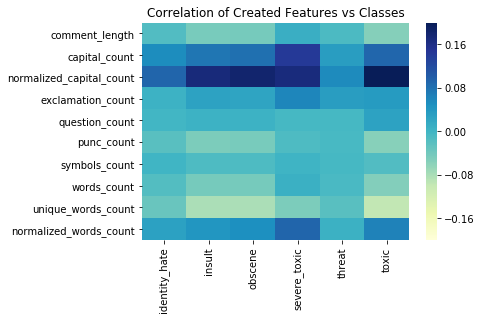

In [278]:
import matplotlib.pyplot as mplot
mplot.title("Correlation of Created Features vs Classes")
mplot.show()

In [268]:
datatrain.to_csv("train_features.csv",index=False)

In [269]:
abc = datatrain_correlations.std(axis=1)

In [270]:
abc

comment_length              0.025462
capital_count               0.037464
normalized_capital_count    0.061509
exclamation_count           0.017933
question_count              0.012020
punc_count                  0.021829
symbols_count               0.006342
words_count                 0.024337
unique_words_count          0.030480
normalized_words_count      0.029361
dtype: float64

In [271]:
abc.argmax()

'normalized_capital_count'

In [272]:
abc.sort_values(ascending=False)

normalized_capital_count    0.061509
capital_count               0.037464
unique_words_count          0.030480
normalized_words_count      0.029361
comment_length              0.025462
words_count                 0.024337
punc_count                  0.021829
exclamation_count           0.017933
question_count              0.012020
symbols_count               0.006342
dtype: float64

In [ ]:
# X_train = hstack((
#     vectorizer.transform(df['comment_text']),
#     csr_matrix(np.reshape(df['caps_vs_length'].values, (df.shape[0], 1))),
#     csr_matrix(np.reshape(df['num_unique_words'].values, (df.shape[0], 1)))
# ))

In [ ]:
datatrain

In [ ]:
Xtrain = datatrain.iloc[:,8:].values

In [ ]:
meanX = numpy.mean(Xtrain,axis=0)
stdX = numpy.std(Xtrain,axis=0)

Xtrain=(Xtrain-meanX)/stdX

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.1,solver='sag',class_weight='balanced',max_iter=2000)
LR_unbalanced=LogisticRegression(C=0.1,solver='sag')
col=['toxic','severe_toxic','obscene','threat','insult','identity_hate']
from sklearn.model_selection import cross_val_score
roc_scores=[]
from sklearn.metrics import accuracy_score

for c in col:
    print(c)
    
    LR.fit(Xtrain,datatrain[c])
    predx = LR.predict(Xtrain)
    print(accuracy_score(datatrain[c], predx))
    print("===============")
    
#     print("precision:"+str(np.mean(cross_val_score(LR,Xtrain,datatrain[c],scoring='precision'))))

    
#     print("recall:"+str(np.mean(cross_val_score(LR,Xtrain,datatrain[c],scoring='recall'))))
    
#     print("accuracy:"+str(np.mean(cross_val_score(LR,Xtrain,datatrain[c],scoring='accuracy'))))
#     roc_scores.append(sc)
      
    
#     LR.fit(train_data,train[c])
 